# Import necessary libraries:

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Load and Preprocess dataset

In [72]:
# Load the dataset using pandas.read_csv

df = pd.read_csv("adult.csv")

In [73]:
# Print first rows the dataset

print(df.head(1))

   age workclass  fnlwgt education  educational-num marital-status  \
0   25   Private  226802      11th                7  Never-married   

          occupation relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  


In [74]:
# Drop rows with any missing values
df.shape

(48842, 15)

In [75]:
# Check for the duplicates in the first dataset
sum(df.duplicated())

52

In [76]:
# Check for duplicates in the title variable in cl_mov
dup = df[df.duplicated() == True]

In [77]:
# Deleting all duplicate rows.
df = df.drop_duplicates()

In [78]:
# Check for unique values in each variable 
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [79]:
# Total number of null values in each feature.
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [80]:
# Missing values are represented as '?' in this dataset.
df = df.replace(['?'], np.nan)

In [81]:
# Total number of null values in each feature.
df.isnull().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [82]:
# Finally, drop rows with any missing values
df.dropna(inplace=True)

In [83]:
df.shape

(45175, 15)

# Visualize dataset

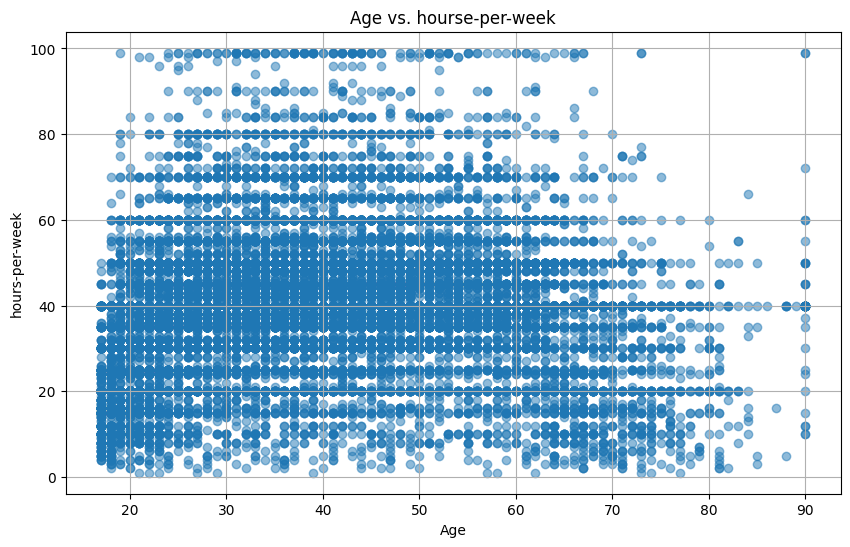

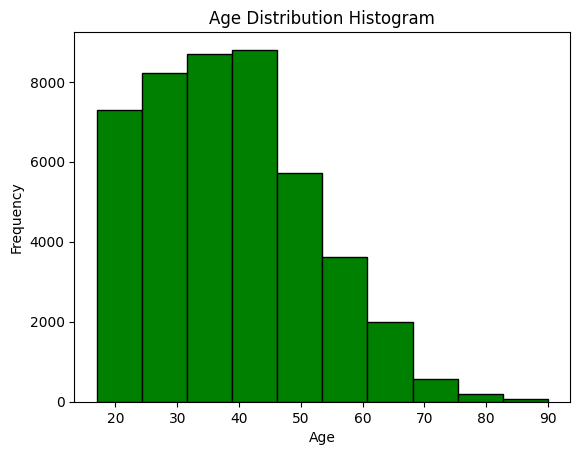

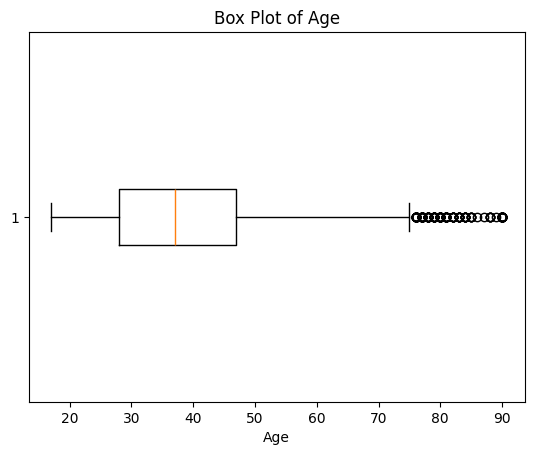

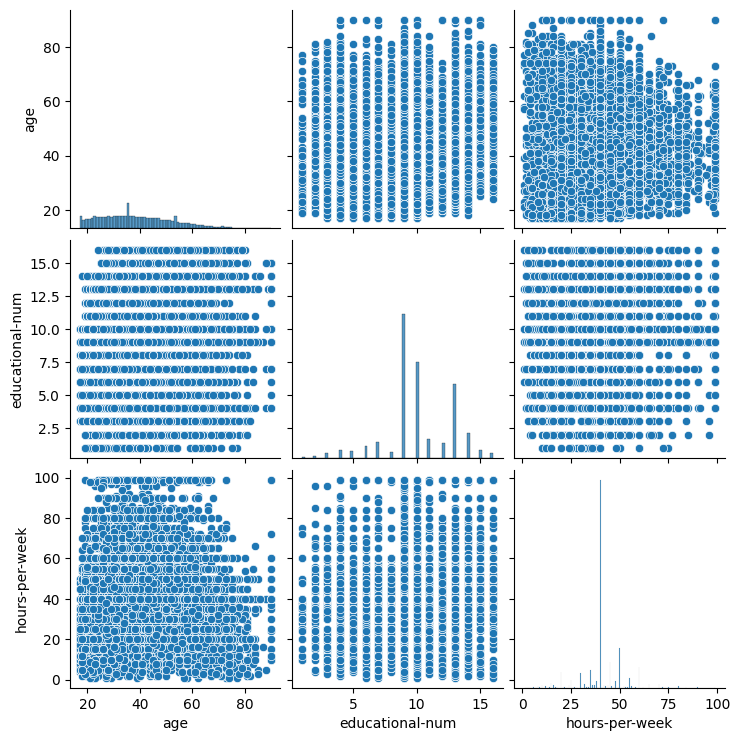

In [84]:
# Visualize the dataset using scatter plots, histograms, box plots, and pair plots to understand the data distribution, identify outliers, and detect patterns.


# Scatter plot for Age vs Hours-per-week

# your code here:

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['hours-per-week'], alpha=0.5)
plt.title('Age vs. hourse-per-week')
plt.xlabel('Age')
plt.ylabel('hours-per-week')
plt.grid(True)

plt.show()




# Histogram for distribution of age distribution

# your code here:

plt.hist(df['age'], bins=10, color='g', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')

plt.show()



# Box plot for age to see outliers

# your code here:

plt.boxplot(df['age'], vert=False)
plt.xlabel('Age')
plt.title('Box Plot of Age')

plt.show()


# Pair plot for Age, education-num, and hours-per-week

# your code here:

columns_to_plot = ['age', 'educational-num', 'hours-per-week']
sns.pairplot(df[columns_to_plot])

plt.show()




# Encode and Normalize dataset

In [85]:
# Use one-hot endcoding to convert categorical features into numerical format

df_encoded = pd.get_dummies(df, columns=['workclass', 'marital-status', 'race', 'gender', 'income', 'native-country', 'relationship', 'occupation'])

In [86]:
df['age']

0        25
1        38
2        28
3        44
5        34
         ..
48837    27
48838    40
48839    58
48840    22
48841    52
Name: age, Length: 45175, dtype: int64

In [87]:
# Use StandardScaler from sklearn.preprocessing to normalize the features.

scaler = StandardScaler()


# your code here:
# Normalizing one-hot encoded features is meaningless.
features_to_normalize = ['age', 'fnlwgt', 'educational-num', 'hours-per-week']
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


# Implement PCA from Scratch

In [88]:
X = df[features_to_normalize].values
number_of_component = 2

covariance_matrix = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvectors = eigenvectors.T
idxs = np.argsort(eigenvalues)[::-1]
components = eigenvectors[idxs[:number_of_component]]

A = np.dot(X, components.T)

# Visualize the PCA-reduced data

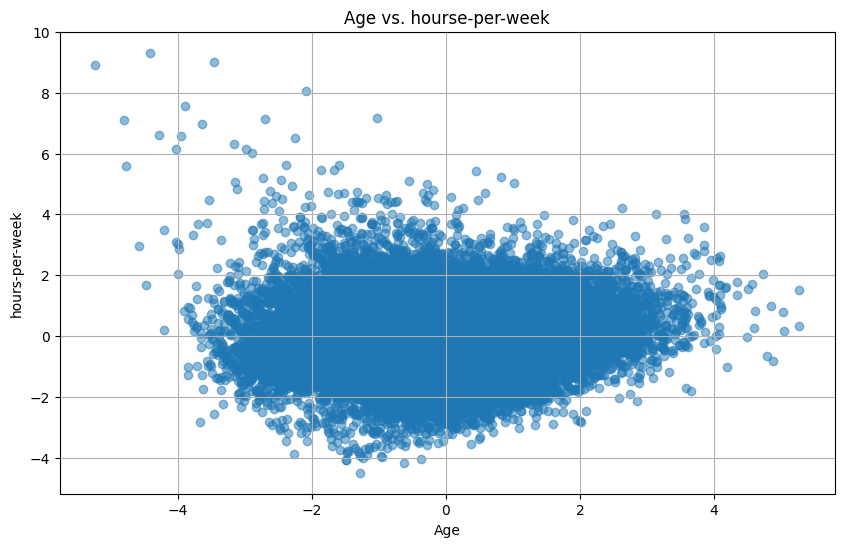

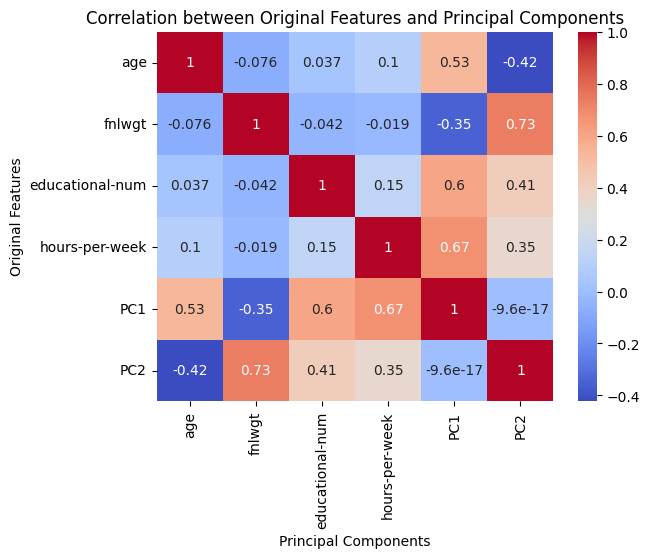

In [89]:

# Scatter Plot for 2D PCA Data (choose 2 pricipal components)

# your code here:

plt.figure(figsize=(10, 6))
plt.scatter(A[:, 0], A[:, 1], alpha=0.5)
plt.title('Age vs. hourse-per-week')
plt.xlabel('Age')
plt.ylabel('hours-per-week')
plt.grid(True)


plt.show()



# Heatmap for Principal Component Correlation
# This requires calculating the correlation matrix between the original data and the PCA-transformed data.

# Convert X and X_pca to pandas DataFrame for easier manipulation
X_df = pd.DataFrame(X, columns= ['age', 'fnlwgt', 'educational-num', 'hours-per-week'])
X_pca_df = pd.DataFrame(A, columns=['PC1', 'PC2'])

# Concatenate original data and PCA-transformed data along columns
combined_df = pd.concat([X_df, X_pca_df], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Original Features and Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()



